# Python Matplotlib CheatSheet
<img src="../sample_files/logos/matplotlib.svg" width="200" />
Matplotlib is a Python 2D plotting library which produces
publication-quality figures in a variety of hardcopy formats
and interactive environments across
platforms.

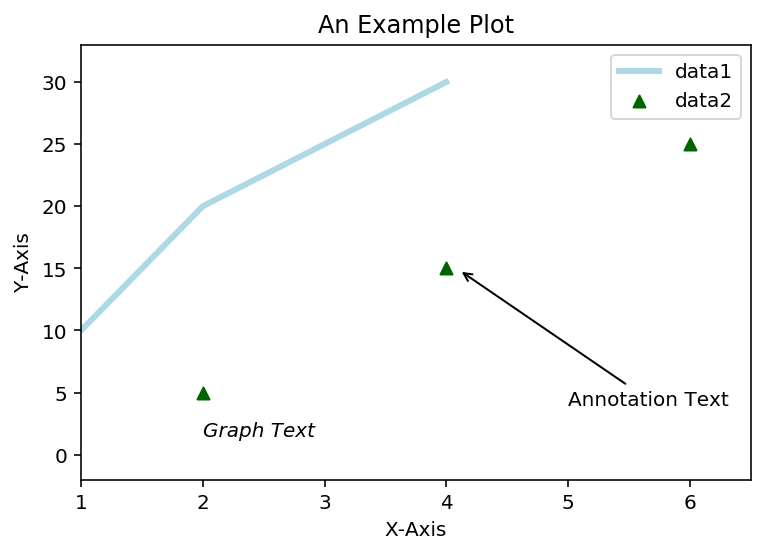

In [89]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'    # Vector output
%config InlineBackend.figure_format = 'retina' # High resolution output
import matplotlib.pyplot as plt
#-- Step 1 - Prepare Data
x = [1,2,3,4]                                      
y = [10,20,25,30]

#-- Step 2 - Create Plot
fig = plt.figure()

#-- Step 3 - Plot
ax = fig.add_subplot(111)
ax.plot(x, y, color='lightblue', linewidth=3, label='data1')      # <=== Step 3&4 - Customize Plot
ax.scatter([2,4,6],
           [5,15,25],
           color='darkgreen',
           marker='^',
           label='data2')

#-- Step 4 - Customize Plot
# Limits
ax.set(xlim=[1, 6.5],ylim=[-2, 33])
# Title, Axis
ax.set(title='An Example Plot',       # Set a title and x-and y-axis labels
       ylabel='Y-Axis',
       xlabel='X-Axis')
# Legend
ax.legend(loc='best')                 # No overlapping plot elements
# Text
ax.text(2,
       1.5,
       'Graph Text',
       style='italic')
# Annatations
ax.annotate("Annotation Text",
            xy=(4.1,14.9), # Flash location
            xycoords='data',
            xytext=(5,4),  # Text Location
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc"),)


#-- Step 5 - Save Plot
plt.savefig('../sample_files/images/matplotlib.png')
#-- Step 6 - Show Plot
# not needed in Jupyter
plt.show()

## 1. Prepare The Data

### 1D Data

In [21]:
import numpy as np
x = np.linspace(0, 10, 100)
y = np.cos(x)
z = np.sin(x)

### 2D Data or Images

In [22]:
data = 2 * np.random.random((10, 10))
data2 = 3 * np.random.random((10, 10))
Y, X = np.mgrid[-3:3:100j, -3:3:100j]
U = -1 - X**2 + Y
V = 1 + X - Y**2

from matplotlib.cbook import get_sample_data
img = np.load('../sample_files/data/bivariate_normal.npy')
#img = np.load(get_sample_data('axes_grid/bivariate_normal.npy'))

## 2. Create Plot

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

### Figure

In [17]:
fig = plt.figure()
fig2 = plt.figure(figsize=plt.figaspect(2.0))

<Figure size 432x288 with 0 Axes>

<Figure size 288x576 with 0 Axes>

### Axes


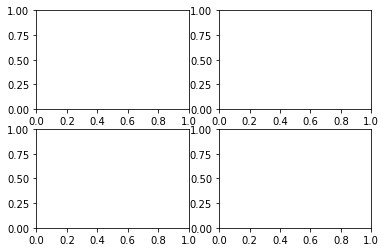

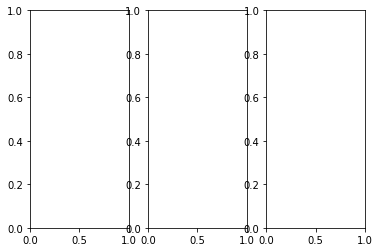

In [18]:
fig.add_axes()
ax1 = fig.add_subplot(221) # row-col-num
ax3 = fig.add_subplot(212)
fig3, axes = plt.subplots(nrows=2,ncols=2)
fig4, axes2 = plt.subplots(ncols=3)

## 3. Plotting Routines

### 1D Data

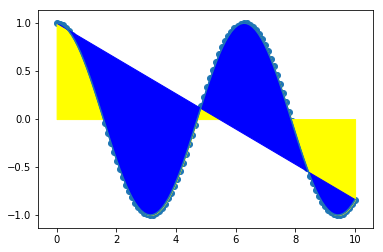

In [19]:
fig, ax = plt.subplots()
lines = ax.plot(x,y)                # Draw points with lines or markers connecting them
ax.scatter(x,y)                     # Draw unconnected points, scaled or colored
axes[0,0].bar([1,2,3],[3,4,5])      # Plot vertical rectangles (constant width)
axes[1,0].barh([0.5,1,2.5],[0,1,2]) # Plot horiontal rectangles (constant height)
axes[1,1].axhline(0.45)             # Draw a horizontal line across axes
axes[0,1].axvline(0.65)             # Draw a vertical line across axes
ax.fill(x,y,color='blue')           # Draw filled polygons
ax.fill_between(x,y,color='yellow') # Fill between y-values and 0

### 2D Data and Images

AttributeError: 'silent_list' object has no attribute 'contourf'

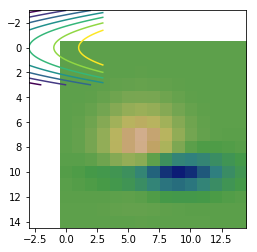

In [42]:
fig, ax = plt.subplots()
im = ax.imshow(img,                     # Colormapped or RGB arrays
               cmap='gist_earth',
               interpolation='nearest',
               vmin=-2,
               vmax=2)
axes2[0].pcolor(data2)     # Pseudocolor plot of 2D array
axes2[0].pcolormesh(data)  # Pseudocolor plot of 2D array
CS = plt.contour(Y,X,U)    # Plot contours
axes2[2].contourf(data)     # Plot filled contours
axes2[2]= ax.clabel(CS)    # Label a contour plot

### Vector Fields

In [44]:
axes[0,1].arrow(0,0,0.5,0.5)  # Add an arrow to the axes
axes[1,1].quiver(y,z)         # Plot a 2D field of arrows
axes[0,1].streamplot(X,Y,U,V) # Plot a 2D field of arrows

### Data Distributions

In [45]:
ax1.hist(y)       # Plot a histogram
ax3.boxplot(y)    # Make a box and whisker plot
ax3.violinplot(z) # Make a violin plot

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f12810fd550>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1281b54b00>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f12810fd9b0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f12810fdc18>}

## 4. Customize Plot

### Colors, Color Bars & Color Maps

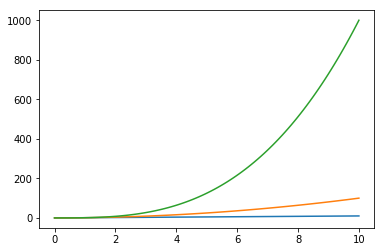

In [46]:
plt.plot(x, x, x, x**2, x, x**3)
ax.plot(x, y, alpha = 0.4)
ax.plot(x, y, c='k')
fig.colorbar(im, orientation='horizontal')
im = ax.imshow(img,
               cmap='seismic')

### Markers

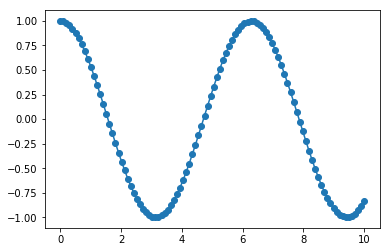

In [47]:
fig, ax = plt.subplots()
ax.scatter(x,y,marker=".")
ax.plot(x,y,marker="o")

### Linestyles

[None, None]

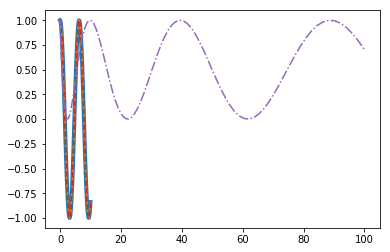

In [48]:
plt.plot(x,y,linewidth=4.0)
plt.plot(x,y,ls='solid')
plt.plot(x,y,ls='--')
plt.plot(x,y,'--',x**2,y**2,'-.')
plt.setp(lines,color='r',linewidth=4.0)

### Text & Annotations

In [51]:
ax.text(1,
       -2.1,
       'Example Graph',
       style='italic')
ax.annotate("Sine",
            xy=(8, 0),
            xycoords='data',
            xytext=(10.5, 0),
            textcoords='data',
            arrowprops=dict(arrowstyle="->",
            connectionstyle="arc3"),)

Text(10.5,0,'Sine')

### Mathtext

Text(0.5,1,'$sigma_i=15$')

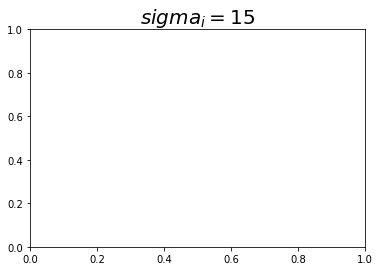

In [52]:
plt.title(r'$sigma_i=15$', fontsize=20)

### Limit, Legens & Layouts

In [54]:
# Limits & Autoscaling
ax.margins(x=0.0,y=0.1)               # Add padding to a plot
ax.axis('equal')                      # Set the aspect ratio of the plot to 1
ax.set(xlim=[0,10.5],ylim=[-1.5,1.5]) # Set limits for x-and y-axis
ax.set_xlim(0,10.5)                   # Set limits for x-axis

# Legends
ax.set(title='An Example Axes',       # Set a title and x-and y-axis labels
ylabel='Y-Axis',
xlabel='X-Axis')
ax.legend(loc='best')                 # No overlapping plot elements

# Ticks
ax.xaxis.set(ticks=range(1,5),        # Manually set x-ticks
             ticklabels=[3,100,-12,"foo"])
ax.tick_params(axis='y',              # Make y-ticks longer and go in and out
               direction='inout',
               length=10)

# Subplot Spacing
fig3.subplots_adjust(wspace=0.5,      # Adjust the spacing between subplots
                     hspace=0.3,
                     left=0.125,
                     right=0.9,
                     top=0.9,
                     bottom=0.1)
fig.tight_layout()                    # Fit subplot(s) in to the figure area

# Axis Spines
ax1.spines['top'].set_visible(False)  # Make the top axis line for a plot invisible
ax1.spines['bottom'].set_position(('outward',10)) # Move the bottom axis line outward

No handles with labels found to put in legend.


## 5. Save Plot

In [55]:
# Save figures
plt.savefig('foo.png')
# Save transparent figures
plt.savefig('foo.png', transparent=True)

<Figure size 432x288 with 0 Axes>

### 6. Show Plot

In [56]:
plt.show()

### Close and Clear

In [57]:
plt.cla()   # Clear an axis
plt.clf()   # Clear the entire figure
plt.close() # Close a window